# How first-time airbnb users travel

## Act I: Setup
New users on Airbnb can book a place to stay in 34,000+ cities across 190+ countries. By accurately predicting where a new user will book their first travel experience, Airbnb can share more personalized content with their community, decrease the average time to first booking, and better forecast demand.

Airbnb challenges you to predict in which destination country - 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found)or 'other'- a new user from the USA will make his or her first booking.

## Act II: Confrontation

## Act III: Resolution



***
***
## Data Exploration

In [2]:
# load libraries that will be used
%matplotlib inline

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from mpl_toolkits.basemap import Basemap

C:\Miniconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# unzip and read user age and gender data
zf = zipfile.ZipFile('data/age_gender_bkts.csv.zip')
demographics = pd.read_csv(zf.open('age_gender_bkts.csv'))

In [4]:
# unzip and read country data
zf = zipfile.ZipFile('data/countries.csv.zip')
countries = pd.read_csv(zf.open('countries.csv'))

In [5]:
# unzip and read user session data
zf = zipfile.ZipFile('data/sessions.csv.zip')
sessions = pd.read_csv(zf.open('sessions.csv'))

In [6]:
# unzip and read train data
zf = zipfile.ZipFile('data/train_users_2.csv.zip')
train = pd.read_csv(zf.open('train_users_2.csv'))

In [7]:
# unzip and read test data
zf = zipfile.ZipFile('data/test_users.csv.zip')
test = pd.read_csv(zf.open('test_users.csv'))

In [13]:
print("Rows: %0.0f; Columns: %0.0f" % np.shape(countries))
countries.head()

Rows: 10; Columns: 7


,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801,fra,92.06


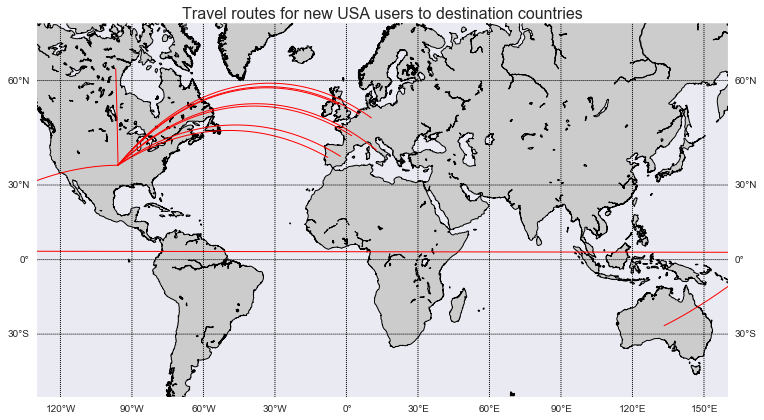

In [11]:
# create new figure, axes instances.
fig=plt.figure(figsize=(12,9))
ax=fig.add_axes([0.1,0.1,0.8,0.8])

# setup mercator map projection as map background
m = Basemap(llcrnrlon=-130.,llcrnrlat=-50.,urcrnrlon=160.,urcrnrlat=70.,\
#m = Basemap(llcrnrlon=-160.,llcrnrlat=10.,urcrnrlon=60.,urcrnrlat=70.,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)

# draw great circle route between USA and destination countries
dest_lon = countries.lng_destination
dest_lat = countries.lat_destination
usa_lon = dest_lon[9]
usa_lat = dest_lat[9]
destinations = len(countries.country_destination)-1 # minus one in order to exclude USA at the end
for i in range(destinations):
    m.drawgreatcircle(usa_lon, usa_lat, dest_lon[i], dest_lat[i], linewidth=1, color='r')

# draw map details
m.drawcoastlines()
m.fillcontinents()
# draw parallels
m.drawparallels(np.arange(-60,90,30),labels=[1,1,0,1])
# draw meridians
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

ax.set_title('Travel routes for new USA users to destination countries', size=16)
plt.show()

In [14]:
print("Rows: %0.0f; Columns: %0.0f" % np.shape(demographics))
demographics.head()

Rows: 420; Columns: 5


,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1,2015
1,95-99,AU,male,9,2015
2,90-94,AU,male,47,2015
3,85-89,AU,male,118,2015
4,80-84,AU,male,199,2015


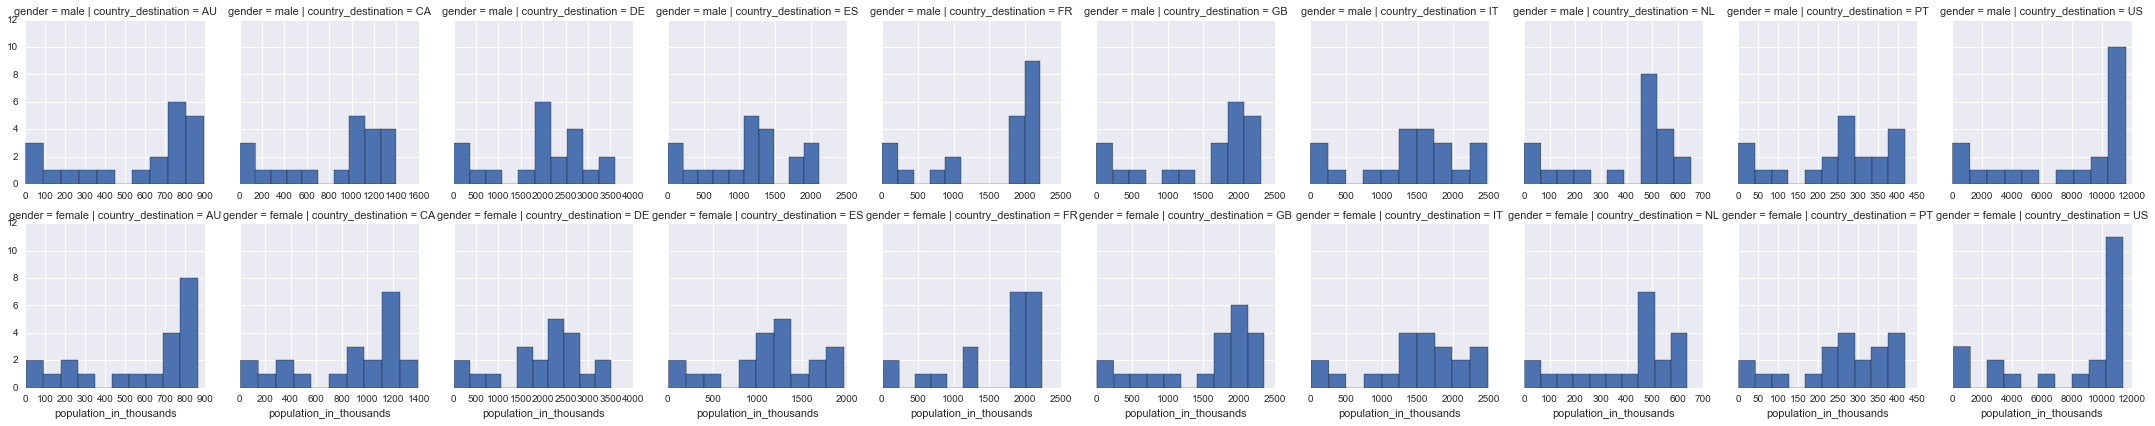

In [48]:
# compare demographic distributions within destination countries
fig=plt.figure(figsize=(20, 16))
g = sns.FacetGrid(demographics, col="country_destination",  row="gender", sharex=False) 
g = g.map(plt.hist, "population_in_thousands")

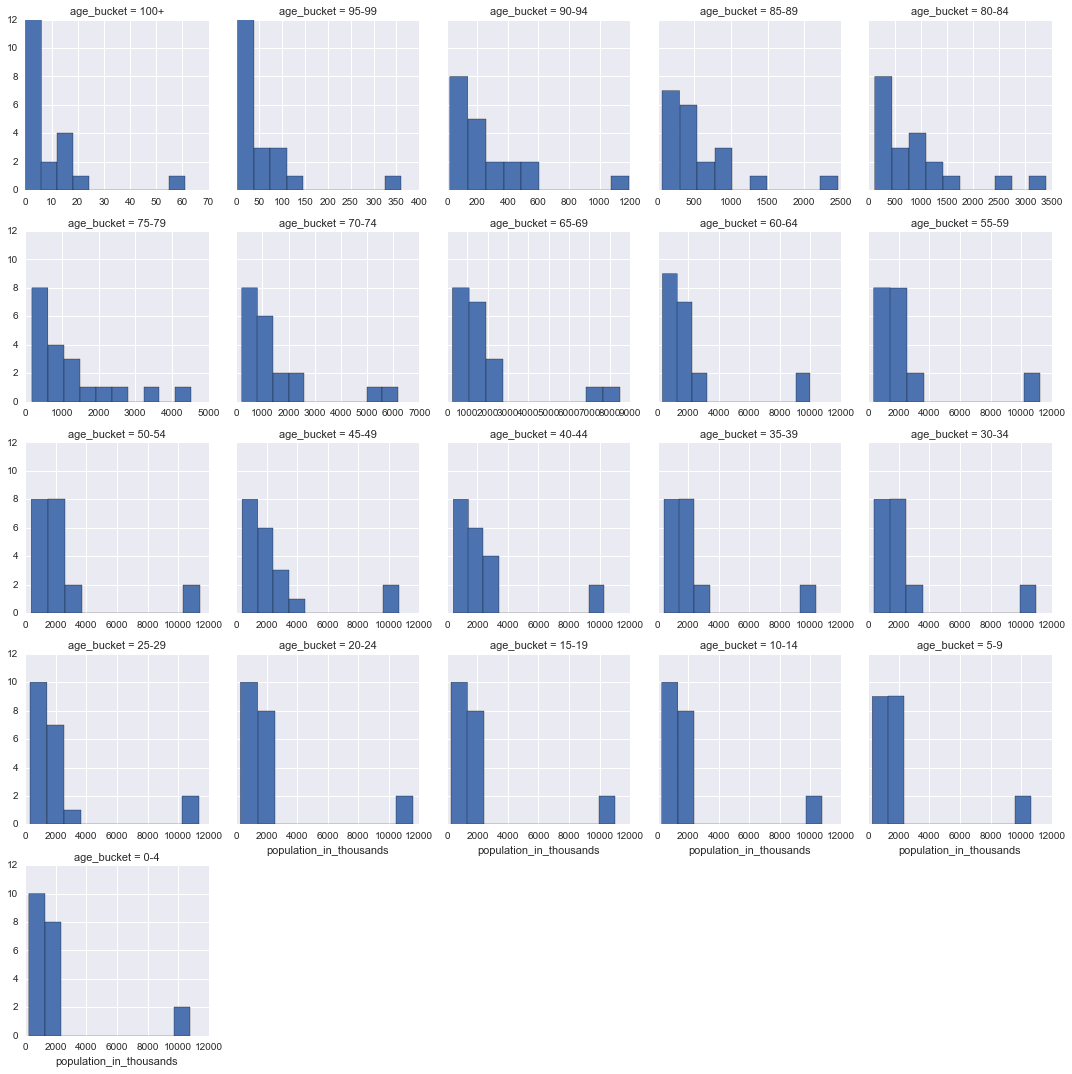

In [66]:
# compare demographic distributions within destination countries
fig=plt.figure(figsize=(20, 16))
g = sns.FacetGrid(demographics, col="age_bucket", col_wrap=5, sharex=False) 
g = g.map(plt.hist, "population_in_thousands")

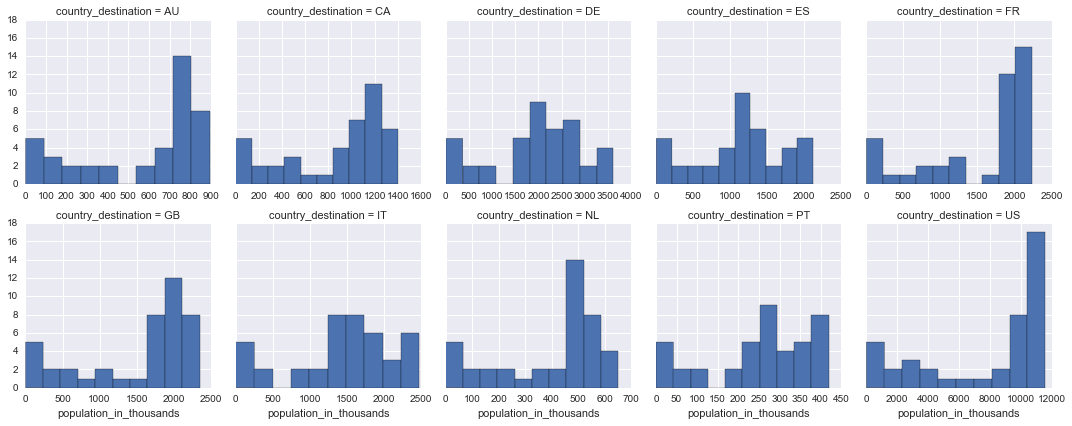

In [56]:
# compare demographic distributions within destination countries
fig=plt.figure(figsize=(20, 16))
g = sns.FacetGrid(demographics, col="country_destination", col_wrap=5, sharex=False) 
g = g.map(plt.hist, "population_in_thousands")

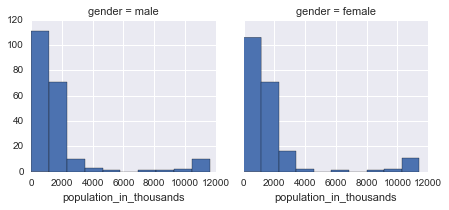

In [60]:
# compare demographic distributions within destination countries
fig=plt.figure(figsize=(20, 16))
g = sns.FacetGrid(demographics, col="gender", col_wrap=5, sharex=False) 
g = g.map(plt.hist, "population_in_thousands");